In [34]:
#필요한 것들을 import한다. 
#model = keras.models.load_model('4_Deep learning_3_saved.h5') 가 되지 않아 복사 붙여넣기 했다..
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

np.random.seed(100)
num_train = 230
num_test = 24
num_epochs = 100
mini_batch = 32

df_training = pd.read_csv('D:\\ai\\final_term\\Google_stock.csv')
df_training1 = df_training.iloc[:num_train, 2:3]

sc = MinMaxScaler(feature_range = (0,1))
training_set = sc.fit_transform(df_training1)

X_train = training_set[0:num_train-1]
Y_train = training_set[1:num_train]

X_train = np.reshape(X_train-1,(num_train-1,1,1))

model = Sequential()

model.add(LSTM(units =  50, return_sequences = True, input_shape = (1,1)))
model.add(Dropout(0,1)) 
model.add(LSTM(units = 50))
model.add(Dropout(0,1))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, Y_train, batch_size = mini_batch, epochs = num_epochs)




Epoch 1/100
229/229 [==============================] - 1s 3ms/step - loss: 0.2990
Epoch 2/100
229/229 [==============================] - 0s 100us/step - loss: 0.2649
Epoch 3/100
229/229 [==============================] - 0s 105us/step - loss: 0.2301
Epoch 4/100
229/229 [==============================] - 0s 109us/step - loss: 0.1917
Epoch 5/100
229/229 [==============================] - 0s 105us/step - loss: 0.1517
Epoch 6/100
229/229 [==============================] - 0s 92us/step - loss: 0.1132
Epoch 7/100
229/229 [==============================] - 0s 105us/step - loss: 0.0854
Epoch 8/100
229/229 [==============================] - 0s 96us/step - loss: 0.0723
Epoch 9/100
229/229 [==============================] - 0s 105us/step - loss: 0.0706
Epoch 10/100
229/229 [==============================] - 0s 96us/step - loss: 0.0678
Epoch 11/100
229/229 [==============================] - 0s 118us/step - loss: 0.0644
Epoch 12/100
229/229 [==============================] - 0s 126us/step - loss: 0

Epoch 98/100
229/229 [==============================] - 0s 96us/step - loss: 0.0021
Epoch 99/100
229/229 [==============================] - 0s 91us/step - loss: 0.0021
Epoch 100/100
229/229 [==============================] - 0s 100us/step - loss: 0.0021


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [36]:
#아까 정했던 Training set 이후의 시가를 testset으로 갖고 온다. 
test_set = pd.read_csv("D:\\ai\\final_term\\Google_stock.csv")
real_stock_price = test_set.iloc[num_train-1:,2:3].values


In [37]:
#실재값을 이용해 예측값을 역변환 한다. 
inputs = real_stock_price
inputs1 = sc.transform(inputs)
inputs2 = np.reshape(inputs1, (num_test, 1, 1))
predicted_stock_price = model.predict(inputs2)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price)
#inverse_transform을 이용

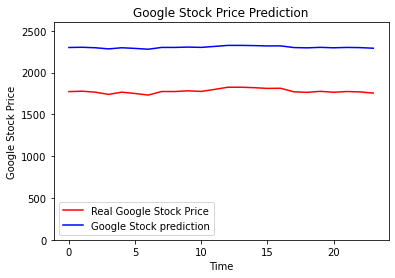

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Google Stock prediction')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim(0,2600)
plt.legend()
plt.show()

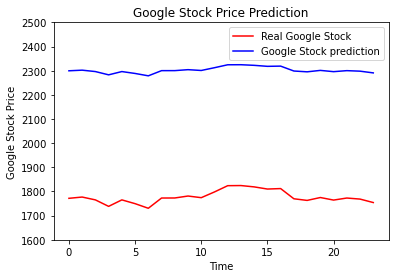

In [43]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock ')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Google Stock prediction')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim(1600,2500)
plt.legend()
plt.show()

In [41]:
#충분한 data set을 training 시키지 못했기 때문에 이러한 오차가 발생한 것으로 보인다. 
#그래도 상당히 비스산 모양을 갖고 predicted 그래프가 그려지는 것을 알 수 있다. 